## The Role and Scope of Statistics

The field of statistics provides a rigorous framework for working with data and uncertainty. It is essential to distinguish between the discipline as a whole and a single calculated value:

  * **The field of statistics**: The practice and study of collecting and analyzing data to answer questions and test theories.
  * **A summary statistic**: A single number that summarizes a feature of a dataset, such as a mean, median, or count.

Statistics excels at answering quantifiable questions and identifying relationships. For example, it can help determine which advertisement is more effective (A/B testing), predict hotel occupancy rates, or find the optimal range of product sizes.

However, statistics alone cannot answer inherently subjective questions or prove causation without a carefully designed experiment. It can show an *association* (e.g., that series with more violent scenes are viewed more often), but it cannot, on its own, prove that the violence *causes* the increase in viewership.

### The Two Branches of Statistics

#### Descriptive Statistics

**Descriptive statistics** is the practice of describing and summarizing the main features of a dataset. The goal is to present the data in a manageable and understandable form without making any conclusions beyond the data itself. Common descriptive statistics include measures of central tendency (mean, median), measures of spread (standard deviation, range), and frequency counts.

#### Inferential Statistics

**Inferential statistics** is the process of using data from a sample to make inferences, generalizations, or conclusions about the larger population from which the sample was drawn. Since we are not working with the entire population, this process always involves a degree of uncertainty, which is quantified using the principles of probability. For example, we might use the commuting habits of a sample of 1,000 city residents to infer the commuting habits of the entire city's population.

### Types of Data

The type of data you have dictates the statistical methods you can apply. Data can be broadly classified into two main types: numeric and categorical.

#### Numeric (Quantitative)

Numeric data represents quantities and can be measured or counted.

  * **Continuous**: Data that can take any value within a given range. It is typically measured.
      * *Examples*: Height, temperature, time, speed.
  * **Discrete**: Data that can only take specific, countable integer values.
      * *Examples*: Number of pets, number of defective products, count of customer arrivals.

#### Categorical (Qualitative)

Categorical data represents groups, labels, or categories.

  * **Nominal**: Categories with no intrinsic order or ranking.
      * *Examples*: Marital status (`Married`, `Single`), country of residence, gender.
  * **Ordinal**: Categories that have a meaningful, logical order but where the intervals between the categories are not necessarily equal.
      * *Examples*: Survey responses (`Strongly Disagree`, `Disagree`, `Neutral`, `Agree`, `Stronggree`), education level (`High School`, `Bachelor's`, `Master's`).

While categorical data can be represented by numbers (e.g., `1` for `Married`, `0` for `Single`), these numbers are just labels and do not have the mathematical properties of numeric data.


### Why Data Type Matters

Identifying your data type is a critical first step because it determines the appropriate summary statistics and analytical methods. In R, this is often handled seamlessly, particularly within the `tidyverse` paradigm.

  * **For Numeric Data**, it is meaningful to calculate statistics like the mean, median, and standard deviation.

    ```r
    # R code using the dplyr package
    car_speeds %>%
      summarize(avg_speed = mean(speed_mph))

    # # A tibble: 1 × 1
    #   avg_speed
    #       <dbl>
    # 1      40.1
    ```

  * **For Categorical Data**, calculating a mean is nonsensical. Instead, we use frequency counts to understand the distribution of the data across the different categories.

    ```r
    # R code using the dplyr package
    demographics %>%
      count(marriage_status)

    # # A tibble: 3 × 2
    #   marriage_status     n
    #   <chr>           <int>
    # 1 divorced          124
    # 2 married           143
    # 3 single            188
    ```

Choosing the correct statistical method based on the data type is fundamental to a sound analysis.

### Measures of Center

When exploring a new dataset, one of the first questions is often about a "typical" value. What is the central point around which the data is distributed? Measures of center provide a single value to summarize this.

#### The Mean

The **mean** is the most common measure of center. It is the arithmetic average, calculated by summing all the values in a dataset and dividing by the number of observations.

$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

In R, you can calculate the mean of a vector or a data frame column using the `mean()` function.

```r
# R code
# Assuming 'msleep' is a tibble in the R environment
mean(msleep$sleep_total)

# [1] 10.43373
```

A key property of the mean is that it is **sensitive to outliers**. A single extreme value can significantly pull the mean in its direction.

#### The Median

The **median** is the value that separates the higher half from the lower half of a data distribution. To find it, you first sort the data; the median is the middle value.

  * If the number of observations (`n`) is odd, the median is the single middle value.
  * If `n` is even, the median is the average of the two middle values.

In R, the `median()` function calculates this value.

```r
# R code
median(msleep$sleep_total)

# [1] 10.1
```

The most important property of the median is that it is **robust to outliers**. Extreme values do not significantly affect its value, making it a better measure of center for skewed data.

#### The Mode

The **mode** is the most frequently occurring value in a dataset. A dataset can have one mode (unimodal), more than one mode (multimodal), or no mode if all values occur with the same frequency.

Base R does not have a standard function to calculate the statistical mode. The idiomatic approach, particularly within the `tidyverse`, is to use `dplyr::count()` to get the frequency of each value and then identify the value with the highest count.

```r
# R code using the dplyr package
# Assuming the pipe operator %>% is loaded (e.g., via library(dplyr))

# Find the mode for a categorical variable
msleep %>%
  count(vore, sort = TRUE)

# # A tibble: 5 × 2
#   vore        n
#   <chr>   <int>
# 1 herbi      32
# 2 omni       20
# 3 carni      19
# 4 NA          7
# 5 insecti     5
```

The mode for the `vore` variable is `herbi`.


### The Impact of Outliers

The primary difference between the mean and the median is their sensitivity to extreme values. Let's consider a small dataset of sleep times for five insectivore mammals.

```r
# R code
# Create a sample tibble
insectivores <- tibble(
  name = c("Big brown bat", "Little brown bat", "Giant armadillo", "Eastern mole", "Tenrec"),
  sleep_total = c(19.7, 19.9, 18.1, 8.4, 10.3)
)

# Calculate mean and median
insectivores %>%
  summarize(
    mean_sleep = mean(sleep_total),
    median_sleep = median(sleep_total)
  )

#   mean_sleep median_sleep
#        <dbl>        <dbl>
# 1       15.3         18.1
```

Now, let's add a single outlier (perhaps a data entry error) and see how the statistics change.

```r
# R code
# Add an outlier value of 0.0
insectivores_with_outlier <- insectivores %>%
  add_row(name = "Mystery insectivore", sleep_total = 0.0)

# Recalculate mean and median
insectivores_with_outlier %>%
  summarize(
    mean_sleep = mean(sleep_total),
    median_sleep = median(sleep_total)
  )

#   mean_sleep median_sleep
#        <dbl>        <dbl>
# 1       12.7         14.2
```

The outlier dragged the **mean** down significantly (from 15.3 to 12.7), while the **median** was much less affected.

### Which Measure to Use?

The choice of which measure of center to use depends on the **shape of your data's distribution**.

  * **For Symmetric Distributions**: If the data is roughly symmetric (like a normal distribution), the mean, median, and mode will be very close. In this case, the **mean** is typically preferred as it incorporates the value of every observation.
  * **For Skewed Distributions or Data with Outliers**: If the data is skewed or contains significant outliers, the **median** is a much more representative and robust measure of the "typical" value. The mean will be pulled in the direction of the long tail or the outlier.
  * **For Categorical Data**: The **mode** is the only meaningful measure of central tendency.

In [1]:
library(ggplot2)
library(dplyr)


msleep <- ggplot2::msleep # explicitly assign for clarity
dplyr::glimpse(msleep) # or head(msleep) to preview the first rows



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Rows: 83
Columns: 11
$ name         <chr> "Cheetah", "Owl monkey", "Mountain beaver", "Greater shor…
$ genus        <chr> "Acinonyx", "Aotus", "Aplodontia", "Blarina", "Bos", "Bra…
$ vore         <chr> "carni", "omni", "herbi", "omni", "herbi", "herbi", "carn…
$ order        <chr> "Carnivora", "Primates", "Rodentia", "Soricomorpha", "Art…
$ conservation <chr> "lc", NA, "nt", "lc", "domesticated", NA, "vu", NA, "dome…
$ sleep_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5…
$ sleep_rem    <dbl> NA, 1.8, 2.4, 2.3, 0.7, 2.2, 1.4, NA, 2.9, NA, 0.6, 0.8, …
$ sleep_cycle  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, N…
$ awake        <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 1…
$ brainwt      <dbl> NA, 0.01550, NA, 0.00029, 0.42300, NA, NA, NA, 0.07000, 0…
$ bodywt       <dbl> 50.000, 0.480, 1.350, 0.019, 600.000, 3.850, 20.490, 0.04…


In [2]:
head(msleep)


name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


In [3]:
mean(msleep$sleep_total)


[1] 10.43373

In [4]:
median(msleep$sleep_total)


[1] 10.1

In [5]:
# Count and sort 'sleep_totat' descending
head(msleep %>% count(sleep_total, sort = TRUE))


sleep_total,n
<dbl>,<int>
12.5,4
10.1,3
5.3,2
6.3,2
8.4,2
8.7,2


In [6]:
# Count and sort 'vore' descending
head(msleep %>% count(vore, sort = TRUE))


vore,n
<chr>,<int>
herbi,32
omni,20
carni,19
NA,7
insecti,5


In [7]:
# Filter rows where dietary category is "insectivores" (vore == "insecti")
msleep %>%
  filter(vore == "insecti") %>%
  summarise(mean_sleep = mean(sleep_total), median = median(sleep_total))


mean_sleep,median
<dbl>,<dbl>
14.94,18.1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


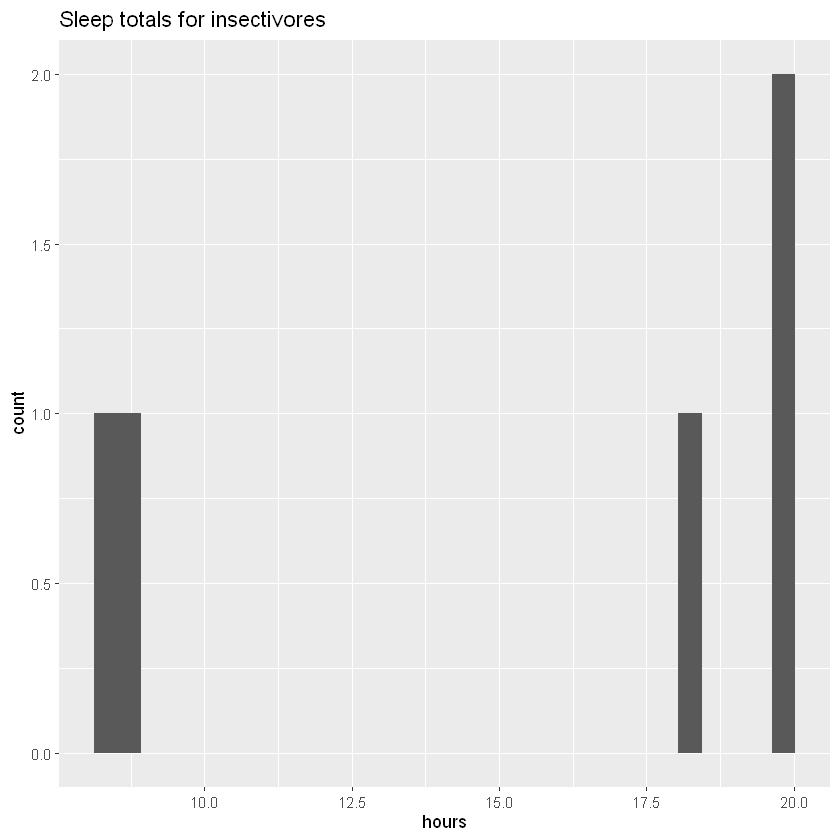

In [8]:
# Filter the dataset to include only rows where the dietary category is "insectivores"
msleep %>%
  filter(vore == "insecti") %>%
  # Create a histogram of total sleep hours for insectivores
  ggplot(aes(x = sleep_total)) +
  geom_histogram() +
  # Add labels for the plot title and axes
  labs(title = "Sleep totals for insectivores", x = "hours", y = "count")


In [9]:
# readRDS from a URL needs a connection; use "rb" mode for binary
food_consumption <- readRDS(url("https://assets.datacamp.com/production/repositories/5758/datasets/db0baead85e109313372094f52254abaae4ea57f/food_consumption.rds", "rb"))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


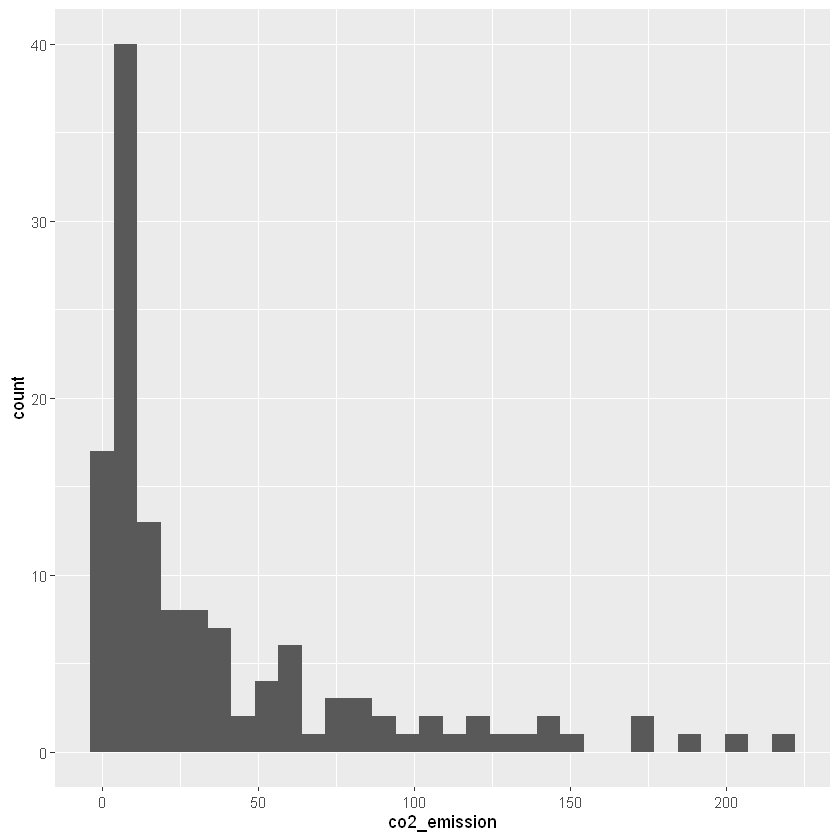

In [10]:
# Filter the dataset to include only rows where the food category is "rice"
food_consumption %>%
  # Filter for rows where the food_category column equals "rice"
  filter(food_category == "rice") %>%
  # Create a histogram to visualize the distribution of CO2 emissions
  ggplot(aes(x = co2_emission)) +
  geom_histogram() # Plot histogram with default binwidth


In [ ]:
food_consumption %>%
  filter(food_category == "rice") %>%
  summarise(
    mean_co2 = mean(co2_emission),
    median_co2 = median(co2_emission)
  )


mean_co2,median_co2
<dbl>,<dbl>
37.59162,15.2


In [ ]:
# option 1 -> it would show mean, median, mode, min, max, standard deviation
food_consumption[food_consumption["food_category"] == "Rice"].describe()

# option 2 -> group by and calculate statistics of group
food_consumption.groupby(["food_category", "co2_emission"])[["Rice"]].agg("median", "mean")

## What is Spread?

While measures of center (like the mean or median) describe a "typical" value in a dataset, they don't provide information about how the data is distributed around that center. **Spread** (also called variability or dispersion) refers to how stretched out or squeezed together the data points are. A dataset with a small spread has data points that are clustered closely together, while a large spread indicates that the data points are far apart.

### Measures Based on the Mean

These measures quantify spread in relation to the dataset's mean.

#### Variance

The **variance** is a fundamental measure of spread, defined as the average of the **squared** distances of each data point from the mean.

The process involves:

1.  Calculating the mean of the data.
2.  Finding the distance (deviation) of each data point from the mean.
3.  Squaring each of these distances.
4.  Averaging the squared distances.

The formula for the sample variance ($s^2$) is:

$$s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$$

Squaring the distances ensures that all values are positive and that larger deviations from the mean are penalized more heavily. In R, this is calculated with the `var()` function.

```r
# R code
# Assuming 'msleep' is a tibble in the R environment
var(msleep$sleep_total)

# [1] 19.80568
```

#### Standard Deviation

The **standard deviation** is the square root of the variance. Its primary advantage is that it is measured in the **same units as the original data**, making it much more interpretable than variance. It represents a "typical" distance of an observation from the mean.

$$s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$$

In R, this is calculated with the `sd()` function.

```r
# R code
sd(msleep$sleep_total)

# [1] 4.450357
```

#### Mean Absolute Deviation (MAD)

The **mean absolute deviation (MAD)** is the average of the **absolute** distances of each data point from the mean. Unlike the standard deviation, it penalizes all distances equally. While less common than standard deviation, it provides another intuitive measure of spread.

$$\text{MAD} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n}$$

```r
# R code
mean(abs(msleep$sleep_total - mean(msleep$sleep_total)))

# [1] 3.566701
```

### Measures Based on Quantiles

These measures describe spread based on how data is divided into equal-sized groups. They are robust to outliers.

#### Quartiles and the Interquartile Range (IQR)

**Quantiles** are cut points that divide a distribution into continuous intervals with equal probabilities. **Quartiles** are a specific type of quantile that divides the data into four equal parts:

  * **Q1 (First Quartile)**: The 25th percentile. 25% of the data falls below this value.
  * **Q2 (Second Quartile)**: The 50th percentile, which is the **median**.
  * **Q3 (Third Quartile)**: The 75th percentile. 75% of the data falls below this value.

The **interquartile range (IQR)** is the distance between the third and first quartiles. It represents the spread of the middle 50% of the data and is highly robust to outliers.

$$\text{IQR} = Q_3 - Q_1$$

In R, the `quantile()` function can be used to find these values, and `IQR()` calculates the IQR directly.

```r
# R code
# Get the quartiles
quantile(msleep$sleep_total)

#       0%      25%      50%      75%     100% 
#     1.90     7.85    10.10    13.75    19.90

# Calculate the IQR
IQR(msleep$sleep_total)

# [1] 5.9
```

#### Identifying Outliers

The IQR is commonly used to define a rule of thumb for identifying **outliers**. An outlier is a data point that is substantially different from the others. A point is considered a potential outlier if it falls outside the following range:

  * **Lower Bound**: $Q_1 - 1.5 \\times \\text{IQR}$
  * **Upper Bound**: $Q_3 + 1.5 \\times \\text{IQR}$

We can use this rule to programmatically identify outliers in R.

```r
# R code using dplyr
# Assuming %>% is loaded from library(dplyr)

# 1. Calculate Q1, Q3, and IQR for bodywt
q1_bodywt <- quantile(msleep$bodywt, 0.25, na.rm = TRUE)
q3_bodywt <- quantile(msleep$bodywt, 0.75, na.rm = TRUE)
iqr_bodywt <- IQR(msleep$bodywt, na.rm = TRUE)

# 2. Define the outlier thresholds
lower_threshold <- q1_bodywt - 1.5 * iqr_bodywt
upper_threshold <- q3_bodywt + 1.5 * iqr_bodywt

# 3. Filter the data to find outliers
msleep %>%
  filter(bodywt < lower_threshold | bodywt > upper_threshold) %>%
  select(name, bodywt)

# # A tibble: 11 × 2
#    name                           bodywt
#    <chr>                           <dbl>
#  1 Cow                              600 
#  2 Northern fur seal                20.5
#  3 Asian elephant                 2547  
#  4 Horse                            521  
#  5 Potto                             1.1
#  6 Human                            62  
#  7 African elephant               6654  
#  8 Giraffe                          529  
#  9 Pilot whale                      800  
# 10 Gray seal                        31  
# 11 Walrus                          1617 
```

In [12]:
# Calculate deviations from the mean (distance of each value from the mean)
dists <- msleep$sleep_total - mean(msleep$sleep_total)

# Square each deviation to eliminate negative values and emphasize larger deviations
squared_dists <- (dists)^2

# Sum the squared deviations (numerator of the variance formula)
sum_squared_dists <- sum(squared_dists)

# Divide by the number of observations minus 1 (unbiased estimator for variance)
sum_squared_dists / (length(msleep$sleep_total) - 1)


[1] 19.80568

In [13]:
# Calculate the variance of the 'sleep_total' column
var(msleep$sleep_total)


[1] 19.80568

In [14]:
# Calculate the standard deviation as the square root of the variance
sqrt(var(msleep$sleep_total))


[1] 4.450357

In [15]:
# Calculate the standard deviation of the 'sleep_total' column
sd(msleep$sleep_total)


[1] 4.450357

In [16]:
# Calculate deviations from the mean (distance of each value from the mean)
dists <- msleep$sleep_total - mean(msleep$sleep_total)

# Calculate the mean absolute deviation
print(mean(abs(dists)))


[1] 3.566701


In [17]:
# Print the quantiles of the 'sleep_total' column (0%, 25%, 50%, 75%, 100%)
print(quantile(msleep$sleep_total))


   0%   25%   50%   75%  100% 
 1.90  7.85 10.10 13.75 19.90 


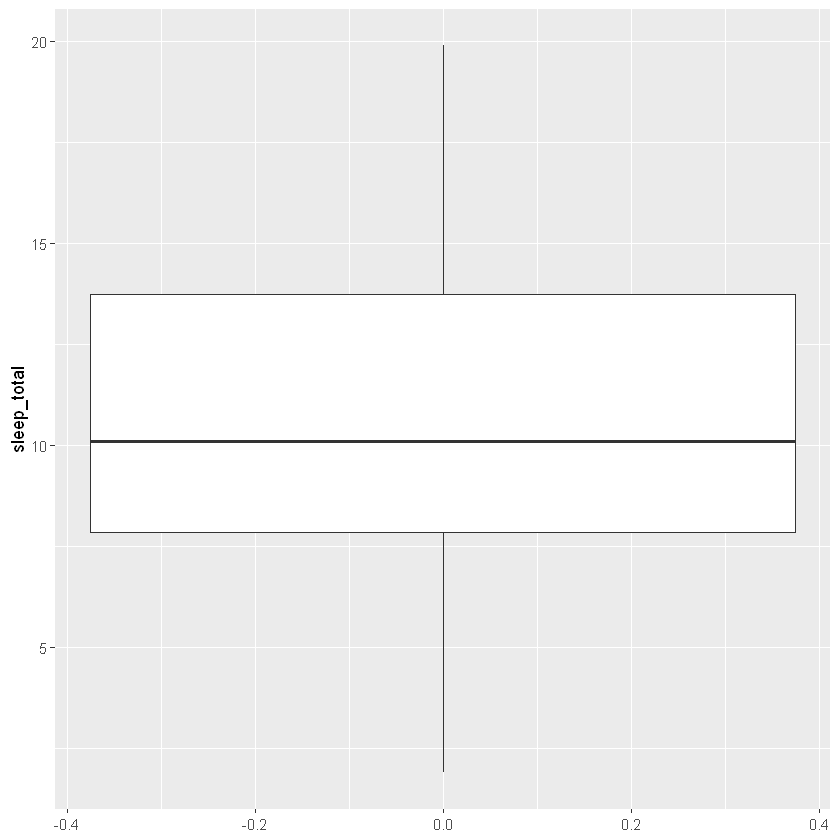

In [18]:
# Boxplots display the median, quartiles (Q1, Q3), and potential outliers
ggplot(msleep, aes(y = sleep_total)) + # Set the y-axis to 'sleep_total'
  geom_boxplot()


In [19]:
# Print quantiles at specified probabilities (0%, 20%, 40%, 60%, 80%, 100%)
print(quantile(msleep$sleep_total, probs = c(0, 0.2, 0.4, 0.6, 0.8, 1)))


   0%   20%   40%   60%   80%  100% 
 1.90  6.24  9.48 11.14 14.40 19.90 


In [20]:
# Print quantiles at specified probabilities (0%, 20%, 40%, 60%, 80%, 100%)
print(quantile(msleep$sleep_total, probs = seq(0, 1, 0.2)))


   0%   20%   40%   60%   80%  100% 
 1.90  6.24  9.48 11.14 14.40 19.90 


In [21]:
# Calculate the interquartile range (IQR)
iqr <- quantile(msleep$sleep_total, 0.75) - quantile(msleep$sleep_total, 0.25)

# Print the calculated IQR, which represents the spread of the middle 50% of the data
print(iqr)


75% 
5.9 


In [22]:
# Calculate the interquartile range (IQR)
iqr <- quantile(msleep$bodywt, 0.75) - quantile(msleep$bodywt, 0.25)

# Calculate the lower threshold for outliers as Q1 - 1.5 * IQR
lower_threshold <- quantile(msleep$bodywt, 0.25) - 1.5 * iqr

# Calculate the upper threshold for outliers as Q3 + 1.5 * IQR
upper_threshold <- quantile(msleep$bodywt, 0.75) + 1.5 * iqr


In [23]:
msleep %>%
  filter(bodywt < lower_threshold | bodywt > upper_threshold) %>%
  select(name, vore, sleep_total, bodywt)


name,vore,sleep_total,bodywt
<chr>,<chr>,<dbl>,<dbl>
Cow,herbi,4.0,600.000
Asian elephant,herbi,3.9,2547.000
Horse,herbi,2.9,521.000
Donkey,herbi,3.1,187.000
Giraffe,herbi,1.9,899.995
Pilot whale,carni,2.7,800.000
African elephant,herbi,3.3,6654.000
Tiger,carni,15.8,162.564
Lion,carni,13.5,161.499


In [24]:
# Calculate the variance of co2_emission in the food_consumption dataset.
var(food_consumption$co2_emission)


[1] 23133.97

In [25]:
# Calculate the standard deviation of co2_emission in the food_consumption dataset.
sd(food_consumption$co2_emission)


[1] 152.0986

In [27]:
# Calculate the quartiles of co2_emission
print(quantile(food_consumption$co2_emission))


       0%       25%       50%       75%      100% 
   0.0000    5.2100   16.5300   62.5975 1712.0000 


In [30]:
# Calculate the quintiles of co2_emission
print(quantile(food_consumption$co2_emission, probs = seq(0, 1, 0.2)))


      0%      20%      40%      60%      80%     100% 
   0.000    3.540   11.026   25.590   99.978 1712.000 


In [32]:
# Calculate the deciles of co2_emission
print(quantile(food_consumption$co2_emission, probs = seq(0, 1, 0.1)))


      0%      10%      20%      30%      40%      50%      60%      70% 
   0.000    0.668    3.540    7.040   11.026   16.530   25.590   44.271 
     80%      90%     100% 
  99.978  203.629 1712.000 


In [34]:
# Compute the 25th percentile and 75th percentile of co2_emission
q1 <- quantile(food_consumption$co2_emission, 0.25)
q3 <- quantile(food_consumption$co2_emission, 0.75)

# Compute the IQR of co2_emission
iqr <- quantile(food_consumption$co2_emission, 0.75) - quantile(food_consumption$co2_emission, 0.25)
print(iqr)


    75% 
57.3875 


In [39]:
# Calculate the lower and upper cutoffs for outliers
lower <- quantile(food_consumption$co2_emission, 0.25) - 1.5 * iqr
upper <- quantile(food_consumption$co2_emission, 0.75) + 1.5 * iqr

lower
upper


25% 
-80.87125

75% 
148.6788

In [46]:
head(food_consumption %>%
  filter(co2_emission < lower | co2_emission > upper))


country,food_category,consumption,co2_emission
<chr>,<fct>,<dbl>,<dbl>
Argentina,beef,55.48,1712.00
Argentina,dairy,195.08,277.87
Australia,beef,33.86,1044.85
Australia,lamb_goat,9.87,345.65
Australia,dairy,234.49,334.01
Albania,beef,22.50,694.30


**Probability** is a measure of the likelihood of an event occurring, calculated as the ratio of favorable outcomes to the total number of possible outcomes. This concept is fundamental to understanding sampling. Events can be **independent**, where one outcome does not affect another (like sampling **with replacement**), or **dependent**, where one outcome changes the probability of another (like sampling **without replacement**).

### Measuring Chance

Probability provides a mathematical framework for quantifying uncertainty. The probability of an event is a number between 0 and 1, where 0 indicates an impossible event and 1 indicates an event that is certain to happen.

The basic formula for the probability of an event is:

$$P(\text{event}) = \frac{\text{Number of ways the event can happen}}{\text{Total number of possible outcomes}}$$

For example, when assigning one of four salespeople to a meeting, the total number of possible outcomes is four. The probability of any single salesperson, such as Brian, being chosen is:

$$P(\text{Brian}) = \frac{1}{4} = 0.25 \quad \text{or} \quad 25\%$$

### Sampling Without Replacement and Dependent Events

**Sampling without replacement** is a process where once an item is selected from a population, it is not returned and cannot be selected again. This is the default behavior for sampling in many scenarios, including the `dplyr::sample_n()` function in R.

```r
# R code using the dplyr package
# Assume 'sales_counts' is a tibble in the R environment with 4 rows

# Set a seed for reproducibility
set.seed(5)
# Sample 2 rows without replacement (the default)
sales_counts %>%
  sample_n(2)

# # A tibble: 2 × 2
#   name      n_sales
#   <chr>       <dbl>
# 1 Brian         126
# 2 Damian         69
```

This method of sampling leads to **dependent events**. Two events are dependent if the outcome of the first event affects the probability of the second event.

Consider selecting two salespeople without replacement. The probability of picking Brian first is $1/4$. *Given that Brian was picked first*, there are only three salespeople left. The probability of then picking Claire second is now $1/3$. Since the probability of the second event changed based on the outcome of the first, the events are dependent.

### Sampling With Replacement and Independent Events

**Sampling with replacement** is a process where an item is returned to the population after being selected, making it available for all subsequent selections. This is specified in R by setting `replace = TRUE` in the sampling function.

```r
# R code using the dplyr package
set.seed(42)
# Sample 2 rows with replacement
sales_counts %>%
  sample_n(2, replace = TRUE)
  
# # A tibble: 2 × 2
#   name      n_sales
#   <chr>       <dbl>
# 1 Damian         69
# 2 Damian         69
```

This method of sampling leads to **independent events**. Two events are independent if the outcome of the first event has no effect on the probability of the second.

When sampling with replacement, the probability of picking Brian first is $1/4$. Because Brian is "put back into the pool," the total number of outcomes for the second pick remains four. The probability of picking Claire second is still $1/4$, regardless of who was picked first. Since the probability of the second event is unaffected by the first, the events are independent.